In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
import cmaps
import cartopy.crs as ccrs

In [2]:
halo = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/halosteric_sea_level_2000_anomaly_1990_2020.nc')
halo = halo.salinity
halo = halo*1000
halo = halo.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/thermosteric_sea_level_2000_anomaly_1990_2020.nc')
therm = data.__xarray_dataarray_variable__
therm = therm*1000
therm = therm.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/steric_sea_level_2000_anomaly_1990_2020.nc')
steric = data.__xarray_dataarray_variable__
steric = steric*1000
steric = steric.groupby('time.year').mean()

In [3]:
from scipy import stats
def trend_3d(x,y):
    nlat=y.shape[1]
    nlon=y.shape[2]
    trend=np.full([nlat,nlon],np.nan)
    p=np.full([nlat,nlon],np.nan)
    for i in range(nlat):
        for j in range(nlon):
            if np.isnan(y[0,i,j]):
                continue
            else:
                slope,intercept,r,pvalue,stderr=stats.linregress(x,y[:,i,j])
                trend[i,j]=slope
                p[i,j]=pvalue
    lat = y.coords['lat']
    lon = y.coords['lon']
    trend=xr.DataArray(trend,coords=[lat,lon],dims=['latitude','longitude'])
    p=xr.DataArray(p,coords=[lat,lon],dims=['latitude','longitude'])
    return trend,p

In [4]:
time = halo.coords['year']

In [5]:
halo_trend,halo_p = trend_3d(time,halo)
therm_trend,therm_p = trend_3d(time,therm)
steric_trend,steric_p = trend_3d(time,steric)

In [10]:
rate =abs(halo_trend)/abs(steric_trend)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

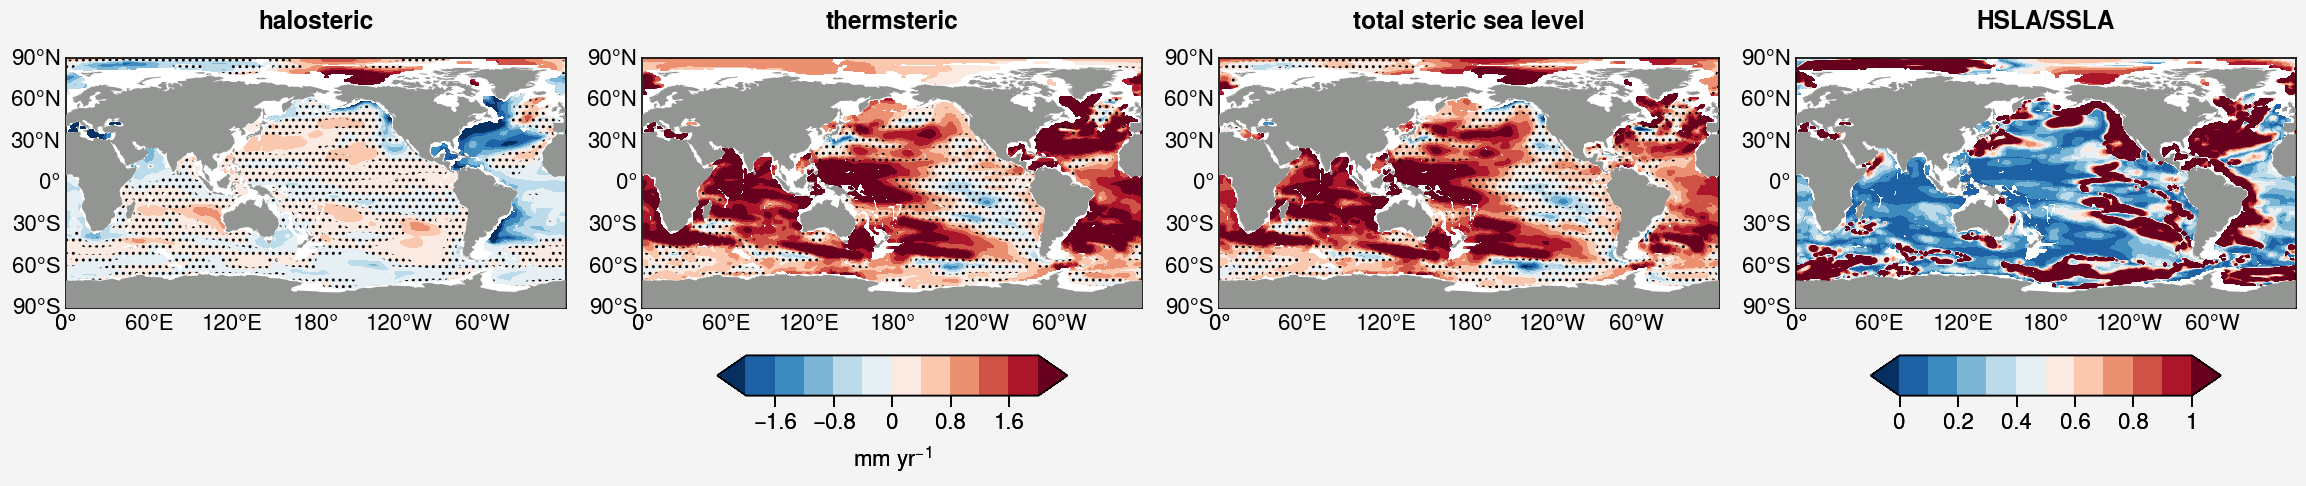

In [28]:
plot.rc.update({'fontsize':8})
fig, axs = plot.subplots(ncols=4,proj='cyl',proj_kw={'lon_0':180},basemap=True,tight=True)
axs.format(collabels=['halosteric','thermsteric','total steric sea level','HSLA/SSLA'])

ax = axs[0]
ax.format(land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,
          latlines=30,lonlines=60,lonlabels=True,titleloc='right')
level = plot.arange(-2,2,0.4) 
filled_c = ax.contourf(halo_trend,levels=level,cmap='RdBu_r',extend='both',labels=False)
filled_r = ax.contourf(halo_p,levels=[np.min(halo_p),0.1,np.max(halo_p)],
                       zorder=1,hatches=[ None,'.....'],colors="none")
cbar = fig.colorbar(filled_c,ticks=0.8,label='mm $yr^{-1}$',length=0.7,loc='b',col=2)

ax = axs[1]
ax.format(land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,
          latlines=30,lonlines=60,lonlabels=True,titleloc='right')
filled_c = ax.contourf(therm_trend,levels=level,cmap='RdBu_r',extend='both',labels=False)
filled_r = ax.contourf(therm_p,levels=[np.min(therm_p),0.1,np.max(therm_p)],
                       zorder=1,hatches=[ None,'.....'],colors="none")

ax = axs[2]
ax.format(land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0,
          latlines=30,lonlines=60,lonlabels=True,titleloc='right')
filled_c = ax.contourf(steric_trend,levels=level,cmap='RdBu_r',extend='both',labels=False)
filled_r = ax.contourf(steric_p,levels=[np.min(steric_p),0.1,np.max(steric_p)],
                       zorder=1,hatches=[ None,'.....'],colors="none")

ax = axs[3]
ax.format(land=True,landcolor='gray',labels=True,landzorder=4,gridlinewidth=0.1,
          latlines=30,lonlines=60,lonlabels=True,titleloc='right')
level = plot.arange(0,1,0.1) 
filled_c = ax.contourf(rate,levels=level,cmap='RdBu_r',extend='both',labels=False)
cbar1 = fig.colorbar(filled_c,ticks=0.2,length=0.7,loc='b',col=4)
fig.savefig('D:/steric_sea_level/fig/Global_trend_steric_sea_level.eps',dpi=600,format='eps')